In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.shape

(30, 3)

In [4]:
df.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [5]:
df.drop("Unnamed: 0", axis =1, inplace =True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


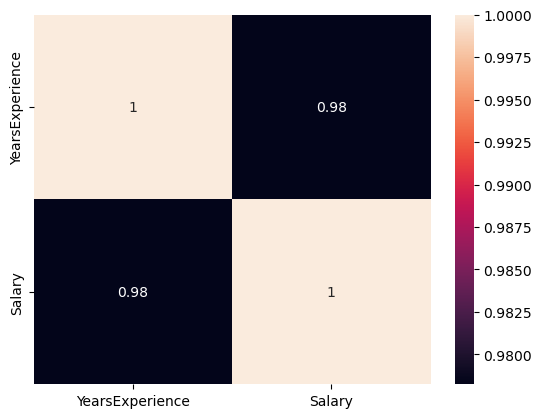

In [57]:
sns.heatmap(df.corr(),annot=True)
plt.show()

## Scatterplot Relationship

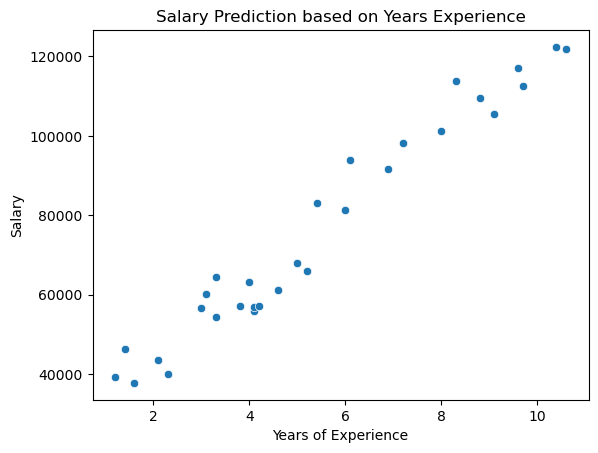

In [59]:
sns.scatterplot(x ='YearsExperience',y ='Salary',data = df)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary Prediction based on Years Experience");

## Least Squares Line

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

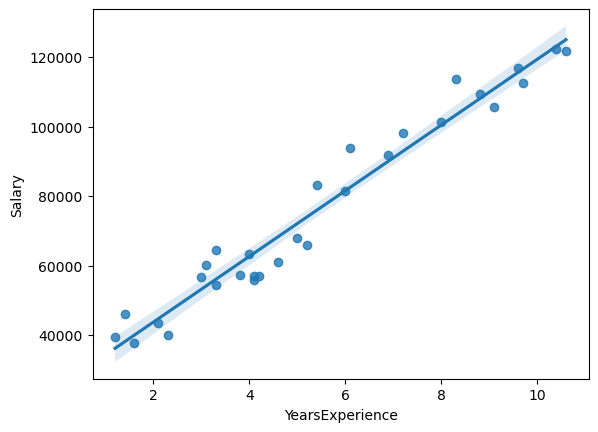

In [7]:
sns.regplot(x ='YearsExperience',y ='Salary',data = df)

In [8]:
X = df["YearsExperience"]
y = df["Salary"]

## Using np.polyfit to solve Ordinary Least Squares - 
- Ordinary Least Squares (OLS) is a method in linear regression that estimates the parameters of a linear model by minimizing the sum of the squares of the differences between observed values and those predicted by the linear model. It finds the best-fitting line through the data points by minimizing the sum of the squared deviations of each point from the line.

In [9]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

#### Manually Creating y = mx + b ---> y = B1x + B0 where sns.regplot(x ='YearsExperience',y ='Salary',data = df) was created above
- Run np.polyfit with degree 1 

In [10]:
# Returns highest order coef first!
np.polyfit( X, y, deg = 1)

array([ 9449.96232146, 24848.20396652])

In [35]:
# Other Years Experience to test model
yrs_experience = np.linspace(1,10,50)

In [36]:
yrs_experience

array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633,  5.2244898 ,  5.40816327,
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ])

In [37]:
# y = B1x + B0
predicted_salary =  9449.96232146 * yrs_experience + 24848.20396652

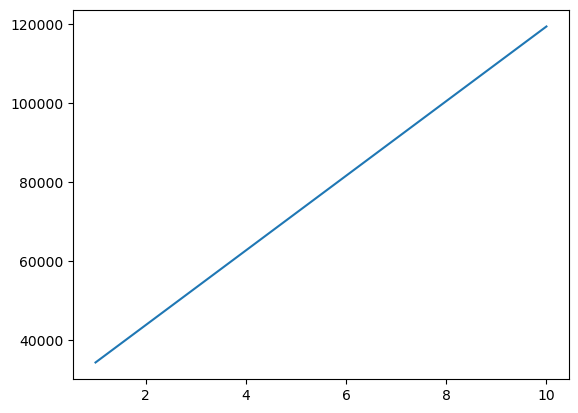

In [38]:
# plotting the y = B1x + B0
plt.plot(yrs_experience, predicted_salary);

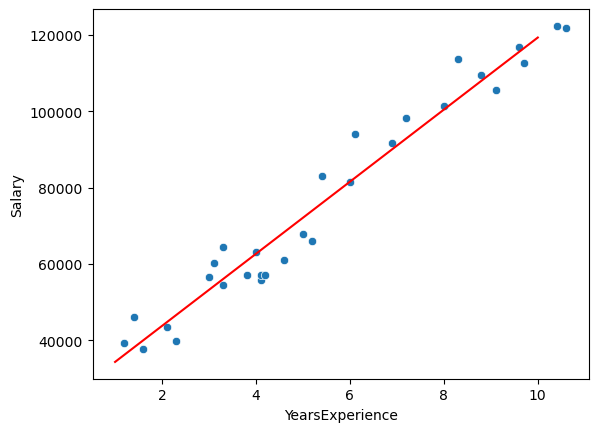

In [39]:
sns.scatterplot(x ='YearsExperience',y ='Salary',data = df)
plt.plot(yrs_experience, predicted_salary, color = "red");

In [48]:
X = np.array(X).reshape(-1,1)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 45)

In [61]:
print(y_train.shape)
y_test.shape

(21,)


(9,)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression()

In [53]:
reg.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict
predicted = reg.predict(X_test)

In [62]:
predict_df = pd.DataFrame({"Actual": y_test, "Predict": predicted, "Difference": (y_test  -  predicted) })
predict_df

,Actual,Predict,Difference
16,66030.0,75356.801652,-9326.801652
27,112636.0,119234.281282,-6598.281282
25,105583.0,113383.950665,-7800.950665
5,56643.0,53905.589388,2737.410612
13,57082.0,65606.250623,-8524.250623
9,57190.0,61706.030211,-4516.030211
29,121873.0,128009.777208,-6136.777208
7,54446.0,56830.754697,-2384.754697
10,63219.0,63656.140417,-437.140417


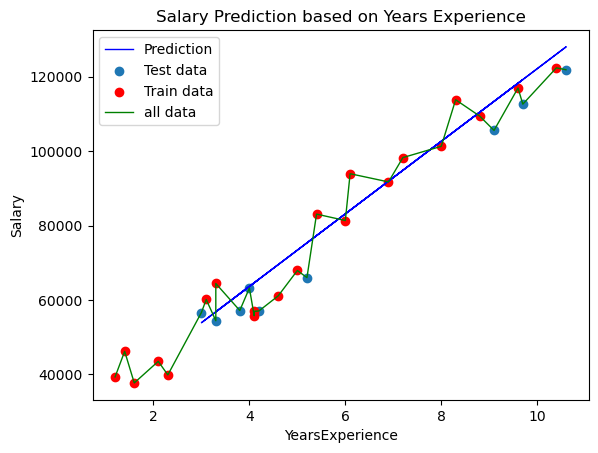

In [84]:
# Plot regression line and scatter
plt.plot(X_test, predicted, color='blue', linewidth=1, label = "Prediction")
plt.scatter(x = X_test, y = y_test, label = 'Test data')
plt.scatter(x = X_train, y = y_train, color = "red", label= 'Train data')
plt.plot(X, y, color='green', linewidth=1, label = "all data")

plt.legend()
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Salary Prediction based on Years Experience");
plt.show()

### R-Squared (R^2)

In [71]:
# R^2 
print('R^2 score: ', reg.score(X_test, y_test)*100)

R^2 score:  94.5208636593747


### Mean_Squared_Error

In [79]:
from sklearn.metrics import mean_squared_error

print('Mean Squared Error: ',mean_squared_error(y_test, predicted))

R^2 Mean Squared Error:  37274483.536874406


### Sqrt Mean_Squared_Error

In [80]:
print('Sqrt Mean Squared Error: ',np.sqrt(mean_squared_error(y_test, predicted)))

Sqrt Mean Squared Error:  6105.283247882477


### Mean_Absolute_Error

In [81]:
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error: ',mean_absolute_error(y_test, predicted))

Mean Absolute Error:  5384.7108186108635
